<font color='green' size='6'>Italy </font>
<font color ='red' size='6'>Menu</font>
<br>

## Research Question
#### Generating meal compositions with AI

**Name:** Andrea <br>
**Name:** Emilio <br>
**Name:** Mayya Lihovodov <br>

**Name:** Igal Khalfin <br>
**Name:** Dima Vornov  <br>
**Name:** Adi Zamir    <br>
**Name:** Adir Nisim   <br>
**Name:** Nir Levy    <br>

Starting Date: 24/11/2022


<font color='green' size='5'>
Import Modules (Packages) </font>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 

from math import inf
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)


<h1><ins>Data Handling Section </ins></h1>
<br>
* read CSV file <br>
* removing rows where quantity < 0 <br>
 * Adding Columns: <br>
<font color='darkgreen'>
    Price_Before_Discount(full price), <br>
    Earnings (Paid price - cost), <br>
    Margin (Earnings / paid price as precentage % view), <br>
    Unit_Price, <br>
    Sale_Month (for EDA and future purpess), <br>
    Menu Category, mapping category by specifay item name (food/soft drink/alcohol).
</font>

In [2]:
df = pd.read_csv('Query_Sicilia_2021.csv', index_col=0)  

In [3]:
df[df.QUANTITY < 0]

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE
2079,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,-1,-1.0,0.0,-0.13,NaN
2080,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,MELANZANE AL POMODORO (C),FOOD,RICETTE FOOD,CONTORNO,-1,-3.9,0.0,-0.31,NaN
2081,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,COCA COLA 33CL TIN,BEVERAGE,ACQUA E SOFT DRINKS,SOFT DRINKS,-1,-3.0,0.0,-0.40,NaN
2082,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,FRUTTA FRESCA,FOOD,RICETTE FOOD,FRUTTA,-1,-3.1,0.0,-0.25,NaN
2083,EXCELLENT,CVC-TRI,RC,499942021-01-14,20210114,20210114,SELF,EXT SELF Passeggeri,84,133738,13.0,GNOCCHI ALLA BOLOGNESE,FOOD,RICETTE FOOD,PRIMO,-1,-4.9,0.0,-0.28,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335501,TENACIA,NAP-TRI,RI,509692021-10-02,20211002,20211002,SELF,TENACIA Front Desk,3,185253,18.0,HAMBURGER ALLA GRIGLIA (C),FOOD,RICETTE FOOD,SECONDO,-1,-8.0,0.0,-0.65,NaN
2335502,TENACIA,NAP-TRI,RI,509692021-10-02,20211002,20211002,SELF,TENACIA Front Desk,3,185253,18.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,-3,-3.0,0.0,-0.40,NaN
2335859,TENACIA,NAP-TRI,RI,599532021-10-09,20211009,20211009,BAR,TENACIA BAR,71,205011,20.0,VECCHIA ROMAGNA E.N. CL 4,BEVERAGE,RICETTE ALCOLICHE,SUPERALCOLICI LISCI,-1,-4.0,0.0,-0.68,NaN
2336556,TENACIA,NAP-TRI,IR,633972021-10-30,20211030,20211030,SELF,TENACIA Front Desk,16,133936,13.0,BIRRA BECK S 33CL BT,BEVERAGE,BIRRE,BIRRA PAX,-1,-4.5,0.0,-0.65,NaN


In [4]:
positive_quantity_df = df[df['QUANTITY'] > 0].copy()

positive_quantity_df['PRICE_BEFORE_DISCOUNT'] = positive_quantity_df['PRICE_PAID'] + positive_quantity_df['DISCOUNT']
positive_quantity_df['EARNINGS'] = positive_quantity_df['PRICE_PAID'] - positive_quantity_df['COST_OF_SALE']
positive_quantity_df["SALE_MONTH"] = pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).month
positive_quantity_df['MARGIN'] = positive_quantity_df['EARNINGS'] / positive_quantity_df['PRICE_PAID']
positive_quantity_df.loc[positive_quantity_df['MARGIN'] < 0, 'MARGIN'] = 0
positive_quantity_df['MARGIN_RAW'] = positive_quantity_df['MARGIN']
positive_quantity_df['MARGIN'] = positive_quantity_df['MARGIN'] * 100
positive_quantity_df['MARGIN'] = positive_quantity_df['MARGIN'].round(2).astype(str) + '%'
positive_quantity_df['UNIT_PRICE'] = positive_quantity_df['PRICE_PAID'] / positive_quantity_df['QUANTITY']
positive_quantity_df = positive_quantity_df[positive_quantity_df.MARGIN != inf]

In [5]:
menu_category = {
    'FOOD':[ 'CROISSANTS E BREAKFAST', 'SNACK', 'PIZZA', 'SALSE MONOPORZIONE', 'SECONDO', 'PRIMO', 'CONTORNO', 'PANE E COPERTO PASTI', 'ANTIPASTO', 
       'DOLCE', 'FRUTTA', 'PANINI', 'CARAMELLE', 'ALTRO', 'GELATI CONFEZIONATI', 'PANE E COPERTO BREAKFAST', 'CONFETTURE', 'CELIACI',
       'PIATTO UNICO', 'MERENDINE', 'PANE E SIMILI', 'CEREALI', 'FORMAGGI', 'BIBITE SCIROPPATE', 'YOGHURT', 'RICORRENZE E DECORAZIONI' ],
    'SOFT DRINK': [ 
        "CAFFE'", 'ACQUA', 'CAPPUCCINO', 'THE E INFUSI', 'SUCCHI', 'SOFT DRINKS', 'GRANITA', 'CIOCCOLATA', ],
    'ALCOHOL': [
        'VINI ITALIANI', 'SUPERALCOLICI LISCI', 'LATTE MACCHIATO', 'APERITIVO', 'BIRRA PAX', 'COCKTAILS', 'SPUMANTE', 'CHAMPAGNE', 'VINO BIANCO', ],
    'CORRECTION': ['CORREZIONE']
}
mapping = {}
for key in menu_category:
    for value in menu_category[key]:
        mapping[value] = key


positive_quantity_df['MENU_CATEGORY'] = positive_quantity_df['ITEM_CATEGORY'].map(mapping)

 <h1><ins>Data EDA-Visualization </ins></h1>
 <br>
 we want to get point of view from margin and earning

In [6]:
margin_by_location = pd.pivot_table(positive_quantity_df, index=['POINT_OF_SALE_LOCATION'], values=['MARGIN_RAW'], aggfunc=np.average)
margin_by_location

,MARGIN_RAW
POINT_OF_SALE_LOCATION,
ANTARES BAR 1,0.794625
ANTARES BAR 2,0.852819
ANTARES RISTORANTE,0.868285
ARIES BAR 1,0.795602
ARIES BAR 2,0.834957
...,...
SPL GELATERIA,0.854253
SPM BAR Centrale,0.727487
SPM BAR Piscina,0.732457


In [7]:
earnings_by_location = pd.pivot_table(positive_quantity_df, index=['POINT_OF_SALE_LOCATION'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_location

,EARNINGS
POINT_OF_SALE_LOCATION,
ANTARES BAR 1,215352.15
ANTARES BAR 2,61800.84
ANTARES Front Desk,3738.77
ANTARES RISTORANTE,123926.97
ANTARES Self Pax,187983.09
...,...
SPM RISTORANTE,16414.05
SPM SELF Passeggeri,95559.30
TENACIA BAR,161258.96


<Axes: xlabel='SHIP'>

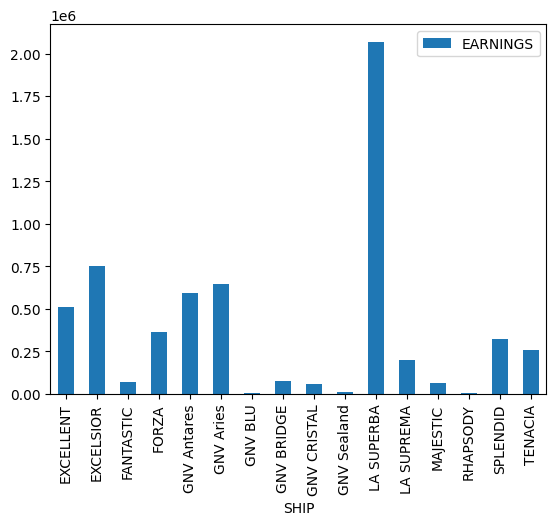

In [8]:
earnings_by_ship = pd.pivot_table(positive_quantity_df, index=['SHIP'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_ship.plot.bar()

<h2>Earnings By Month</h2>
<h4>As we can see, <strong>summer</strong> season is the stongest season of them all when it comes to earnings</h4>

<Axes: xlabel='SALE_MONTH'>

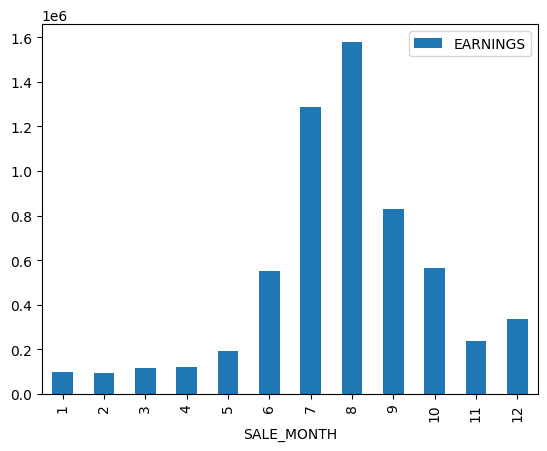

In [9]:
earnings_by_month = pd.pivot_table(positive_quantity_df, index=['SALE_MONTH'], values=['EARNINGS'], aggfunc=np.sum)
earnings_by_month.plot.bar()

<h2>Top sellers of each month</h2>
<h4>As we can see, <strong>summer</strong> season is the stongest season of them all when it comes to earnings</h4>

In [10]:
groupby_quantity = positive_quantity_df.groupby(['SALE_MONTH','ITEM_CATEGORY']).agg({'QUANTITY':sum})
groupby_month = groupby_quantity['QUANTITY'].groupby('SALE_MONTH', group_keys=False)
groupby_month.nlargest(3)


SALE_MONTH  ITEM_CATEGORY         
1           CAFFE'                    20633
            PANE E COPERTO PASTI      11910
            CONTORNO                  10446
2           CAFFE'                    21689
            PANE E COPERTO PASTI      13206
                                      ...  
11          PANE E COPERTO PASTI      18818
            CROISSANTS E BREAKFAST    16783
12          CAFFE'                    41241
            PANE E COPERTO PASTI      21818
            CROISSANTS E BREAKFAST    21121
Name: QUANTITY, Length: 36, dtype: int64

In [11]:
seasonal_df = positive_quantity_df.copy()
mapping = {}
for i in range(1,12):
    if(i<3):
        mapping[i]='Winter'
    elif(i>=3 and i<6):
        mapping[i]='Spring'
    elif(i>=6 and i <9):
        mapping[i]='Summer'
    else:
        mapping[i]='Autumn'
mapping[12]='Winter'
seasonal_df['Seasons']= seasonal_df['SALE_MONTH'].map(mapping)
seasonal_df.groupby(['Seasons','MENU_CATEGORY']).agg({'QUANTITY':sum})

QUANTITY
Seasons MENU_CATEGORY          
Autumn  ALCOHOL           67651
        CORRECTION         1193
        FOOD             554480
        SOFT DRINK       359204
Spring  ALCOHOL           31752
        CORRECTION          980
        FOOD             299546
        SOFT DRINK       176328
Summer  ALCOHOL          110035
        CORRECTION         1579
        FOOD             864819
        SOFT DRINK       635686
Winter  ALCOHOL           27913
        CORRECTION          776
        FOOD             296348
        SOFT DRINK       174703

<Axes: ylabel='Seasons'>

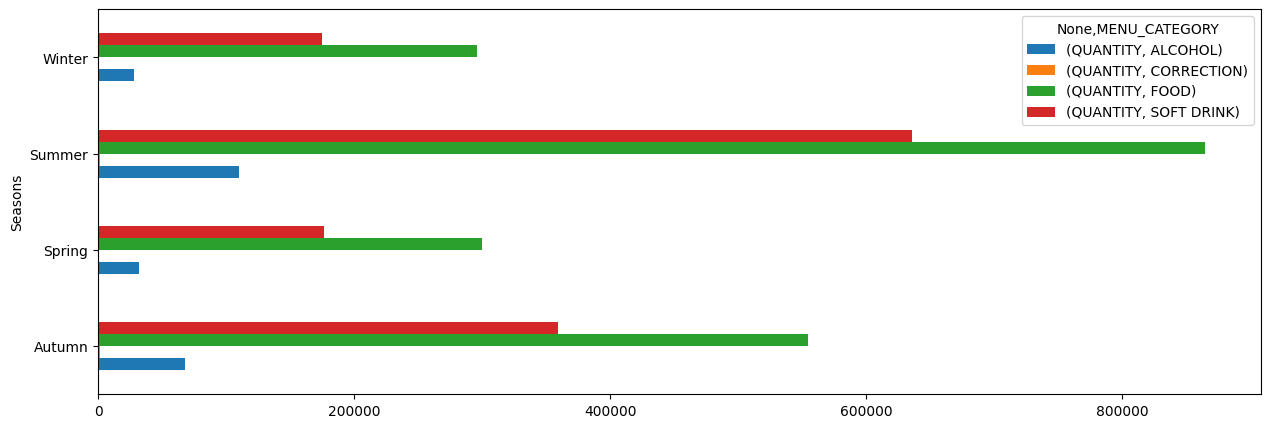

In [12]:
seasonal_df.groupby(['Seasons','MENU_CATEGORY']).agg({'QUANTITY':sum}).unstack(1).plot.barh(figsize=(15,5))

<Axes: ylabel='Seasons'>

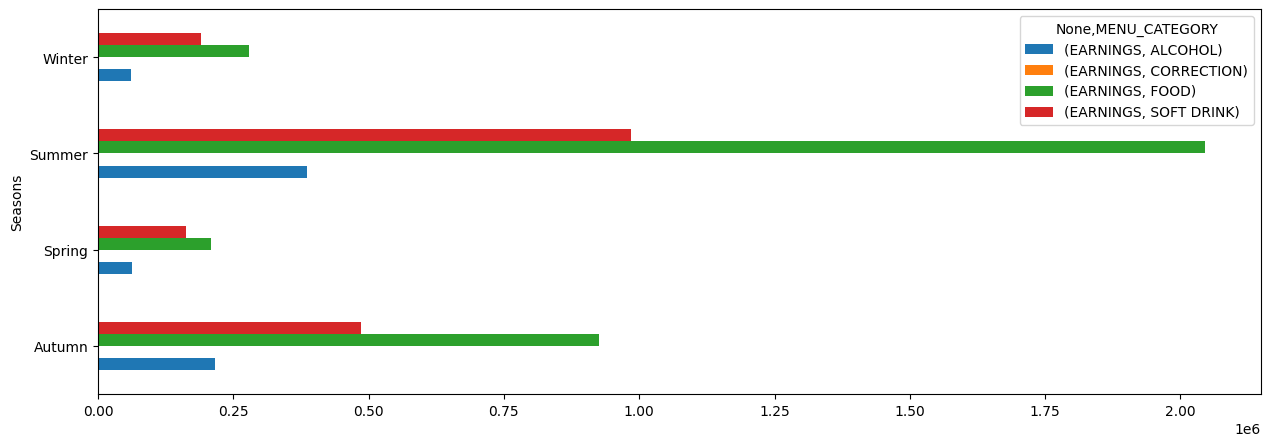

In [13]:
seasonal_df.groupby(['Seasons','MENU_CATEGORY']).agg({'EARNINGS':sum}).unstack(1).plot.barh(figsize=(15,5))

<Axes: ylabel='SALE_DAY'>

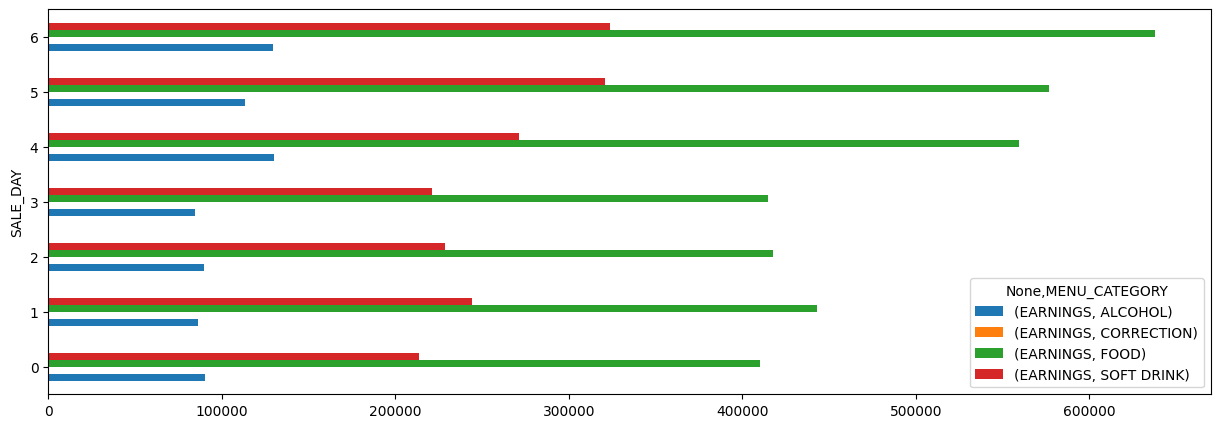

In [14]:

seasonal_df["SALE_DAY"]=pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).dayofweek
seasonal_df.groupby(['SALE_DAY','MENU_CATEGORY']).agg({'EARNINGS':sum}).unstack(1).plot.barh(figsize=(15,5))


<Axes: ylabel='SALE_DAY'>

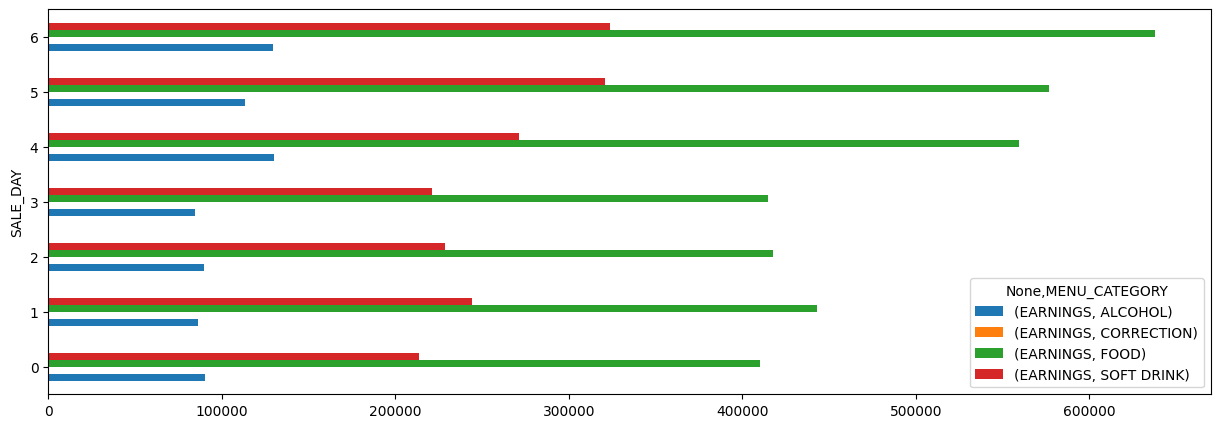

In [15]:
seasonal_df["SALE_DAY"]=pd.DatetimeIndex(pd.to_datetime(positive_quantity_df["SALE_DATE"], format='%Y%m%d', errors='ignore')).dayofweek
seasonal_df.groupby(['SALE_DAY','MENU_CATEGORY']).agg({'EARNINGS':'sum'},{'EARNINGS':'mean'}).unstack(1).plot.barh(figsize=(15,5))

## Sales season classification
### We will be classifing all the sales periods to season tiers of sales volumes: High, Mid, Low

In [16]:
mapping = {}
for i in range(1, 13):
    if(i in { 7, 8 }):
        mapping[i] = 'High'
    elif(i in { 6, 9, 10 }):
        mapping[i] = 'Mid'
    else:
        mapping[i] = 'Low'

seasonal_df['SALES_TIER_SEASON'] = seasonal_df['SALE_MONTH'].map(mapping)
seasonal_df

,SHIP,LINE,ROUTE,VOYAGE_ID_VOYAGE_DATE,VOYAGE_DATE,SALE_DATE,POINT_OF_SALE,POINT_OF_SALE_LOCATION,BILL_NUMBER,BILL_TIME,BILL_HOUR,ITEM,ITEM_MACROCATEGORY_1,ITEM_MACROCATEGORY_2,ITEM_CATEGORY,QUANTITY,PRICE_PAID,DISCOUNT,COST_OF_SALE,DISCOUNT_CODE,PRICE_BEFORE_DISCOUNT,EARNINGS,SALE_MONTH,MARGIN,MARGIN_RAW,UNIT_PRICE,MENU_CATEGORY,Seasons,SALE_DAY,SALES_TIER_SEASON
0,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,2,75107,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',1,0.84,0.56,0.06,SPE,1.4,0.78,1,92.86%,0.928571,0.84,SOFT DRINK,Winter,4,Low
1,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,3,75123,7.0,CAFFE ESPRESSO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAFFE',2,1.68,1.12,0.13,SPE,2.8,1.55,1,92.26%,0.922619,0.84,SOFT DRINK,Winter,4,Low
2,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,4,80518,8.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,1.50,0.00,0.11,NaN,1.5,1.39,1,92.67%,0.926667,1.50,SOFT DRINK,Winter,4,Low
3,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CROISSANT CREMA NOCC. 85G FRZ,FOOD,PASTICCERIA,CROISSANTS E BREAKFAST,1,0.00,1.80,0.36,SA1,1.8,-0.36,1,0.0%,0.000000,0.00,FOOD,Winter,4,Low
4,EXCELLENT,CVC-PMO,CP,506702021-01-15,20210115,20210115,BAR,EXT BAR Piscina,5,80618,8.0,CAPPUCCINO,BEVERAGE,CAFFETTERIA E BEVANDE CALDE,CAPPUCCINO,1,0.00,2.00,0.15,SA1,2.0,-0.15,1,0.0%,0.000000,0.00,SOFT DRINK,Winter,4,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2338035,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ACQUA NAT 50CL PET,BEVERAGE,ACQUA E SOFT DRINKS,ACQUA,1,0.00,1.50,0.11,SA1,1.5,-0.11,12,0.0%,0.000000,0.00,SOFT DRINK,Winter,5,Low
2338036,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,PANE E SERVIZIO SELF,FOOD,RICETTE FOOD,PANE E COPERTO PASTI,6,0.00,6.00,0.81,SA1,6.0,-0.81,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low
2338037,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,VERDURA AL VAPORE,FOOD,RICETTE FOOD,CONTORNO,6,0.00,23.40,0.98,SA1,23.4,-0.98,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low
2338038,TENACIA,NAP-TRI,IR,642852021-12-04,20211204,20211204,SELF,TENACIA Self Pax,40,202459,20.0,ANELLETTI AL FORNO ALLA SICILIANA,FOOD,RICETTE FOOD,PRIMO,6,0.00,46.80,4.72,SA1,46.8,-4.72,12,0.0%,0.000000,0.00,FOOD,Winter,5,Low


## Meal Name Correlation By Bill

In [17]:
group_headers = ['SHIP', 'LINE', 'ROUTE', 'VOYAGE_ID_VOYAGE_DATE', 'VOYAGE_DATE', 'SALE_DATE',
                 'POINT_OF_SALE', 'POINT_OF_SALE_LOCATION', 'BILL_NUMBER', 'BILL_TIME', 'BILL_HOUR', 'Seasons',	'SALES_TIER_SEASON']

seasonal_df['JOINED_ITEM'] = seasonal_df['ITEM'].str.replace('  ', '_').str.replace(' ', '_')

seasonal_df['JOINED_ITEM']

0                             CAFFE_ESPRESSO
1                             CAFFE_ESPRESSO
2                         ACQUA_NAT_50CL_PET
3              CROISSANT_CREMA_NOCC._85G_FRZ
4                                 CAPPUCCINO
                         ...                
2338035                   ACQUA_NAT_50CL_PET
2338036                 PANE_E_SERVIZIO_SELF
2338037                    VERDURA_AL_VAPORE
2338038    ANELLETTI_AL_FORNO_ALLA_SICILIANA
2338039              COCA_COLA_ZERO_33CL_TIN
Name: JOINED_ITEM, Length: 2333815, dtype: object

### List of joined items by bill

In [18]:
joined_bill_df = seasonal_df.groupby(group_headers)['JOINED_ITEM'].transform(lambda x: ' '.join(x))

joined_bill_df = pd.DataFrame(joined_bill_df)
joined_bill_df

,JOINED_ITEM
0,CAFFE_ESPRESSO
1,CAFFE_ESPRESSO
2,ACQUA_NAT_50CL_PET
3,CROISSANT_CREMA_NOCC._85G_FRZ CAPPUCCINO
4,CROISSANT_CREMA_NOCC._85G_FRZ CAPPUCCINO
...,...
2338035,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTT...
2338036,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTT...
2338037,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTT...
2338038,COCA_COLA_33CL_TIN POLPETTE_IN_UMIDO_(C) FRUTT...


In [19]:
customStopwords=list(STOPWORDS) + ['CAFFE', 'nat', 'gas', 'al', 'pet', 'cl', 'g', 'self', 'fz', 'servizio'] + [f'{x}cl' for x in range(0,200)] + [f'{x}g' for x in range(0,200)]

c_vec = CountVectorizer(stop_words=customStopwords, ngram_range=(2,3))
ngrams = c_vec.fit_transform(joined_bill_df.head(100000)['JOINED_ITEM'])
count_values = ngrams.toarray().sum(axis=0)
count_values
vocab = c_vec.vocabulary_
df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'FREQUENCY', 1:'BIGRAM_TRIGRAM'})


C:\Users\Dima\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'caffe', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn(


In [20]:
df_ngram

,FREQUENCY,BIGRAM_TRIGRAM
0,6857,cornetto_marmell _lievitato_fz
1,5934,croissant_crema_nocc _85g_frz
2,2343,pane_e_servizio_self patatine_fritte
3,2239,muffin_doppio_cioccol _90g_frz
4,2143,birra_peroni_n azzurro_33cl_bt
...,...,...
37974,2,30 croissant_crema_nocc
37975,2,30 cookies_cioko_latte_50g
37976,2,30 caffe_americano
37977,2,30 birra_peroni_n azzurro_33cl_bt


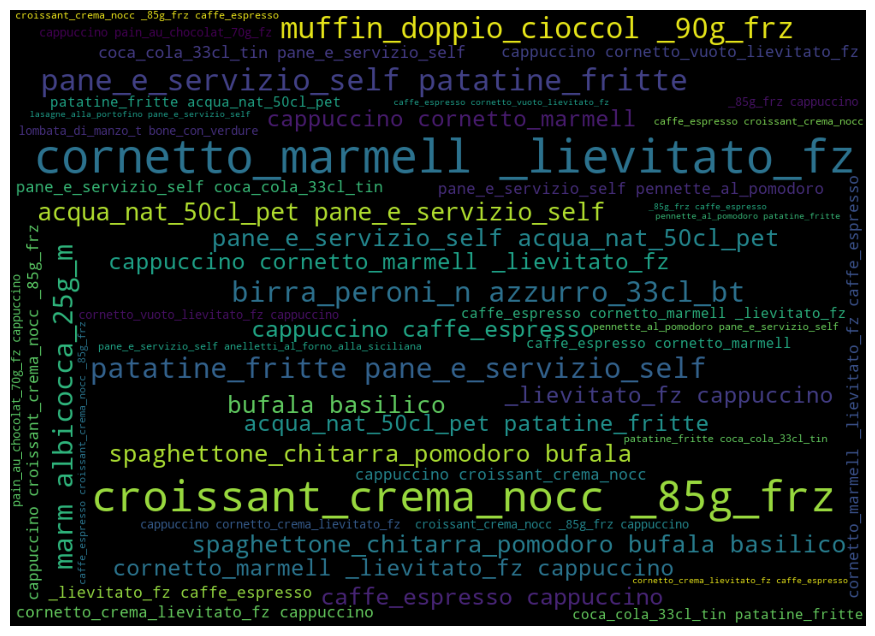

In [21]:
d = {}
for a, x in df_ngram.values:
    d[x] = a

wordcloudimage = WordCloud( max_words=50,
                            font_step=2 ,
                            max_font_size=500,
                            stopwords=customStopwords,
                            background_color='black',
                            width=1000,
                            height=720,
                            collocations=False
                          ).generate_from_frequencies(d)
 
plt.figure(figsize=(20,8))
plt.imshow(wordcloudimage)
plt.axis("off")
plt.show()

## Margin-Volume matrix


<Axes: >

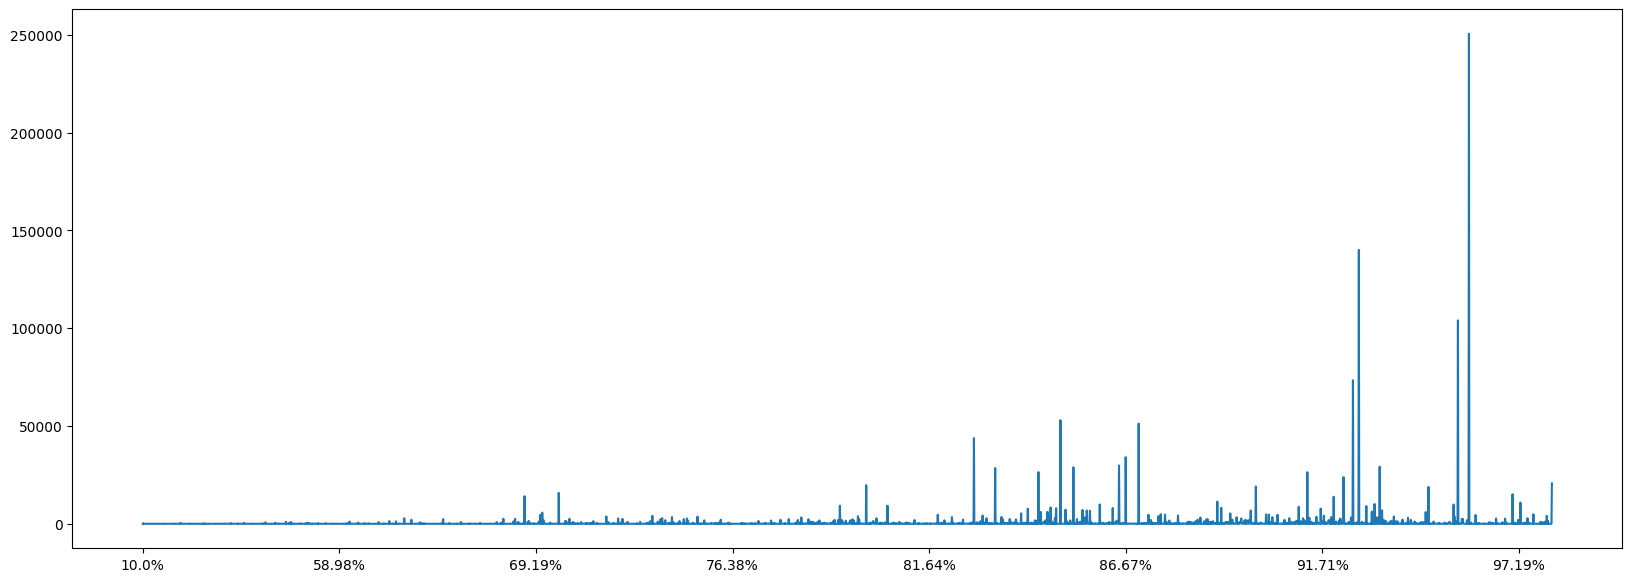

In [22]:
margins=seasonal_df['MARGIN'].value_counts()
margins=margins.drop(labels=['0.0%'])
margins.sort_index(inplace=True)
margins.plot(figsize=(20, 7))


<h2> Total earnings by weekend</h2>
<h4>Separate the data between weekend days and not.</h4>
<h4>Sunday - Wednesday  - Not weekend</h4>
<h4>Thursday - Saturday - Weekend.</h4>
<h4>Display the earning between them</h4>

<Axes: ylabel='None,WEEKEND_SALE'>

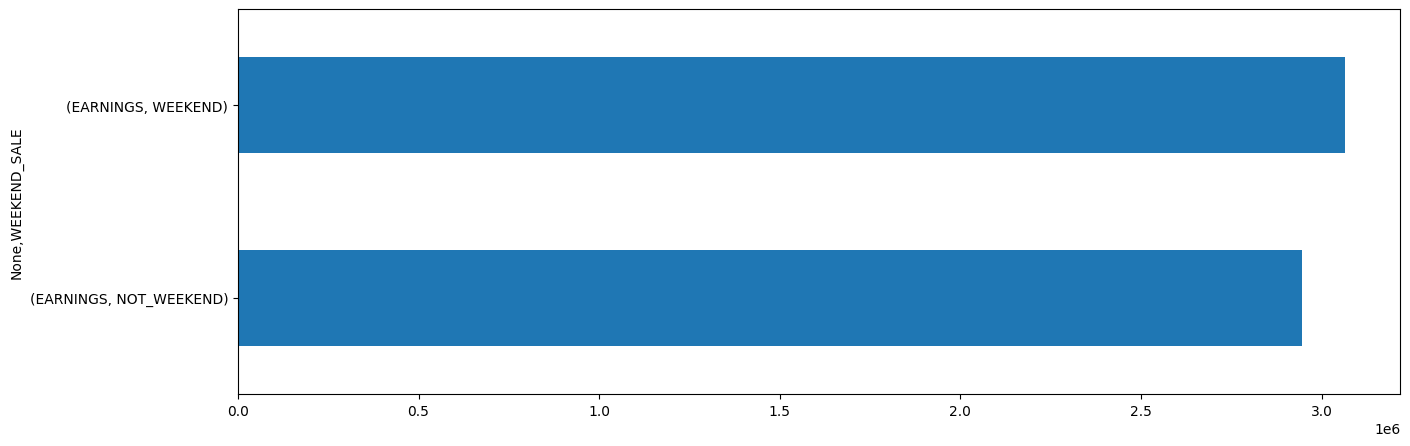

In [23]:
week_end_choice=['WEEKEND','NOT_WEEKEND']
weekend_mapping={}
for i in range(0,7):
    if(i in{4,6,5}):
        weekend_mapping[i]='WEEKEND'
    else:
        weekend_mapping[i]='NOT_WEEKEND'


seasonal_df['WEEKEND_SALE']=seasonal_df['SALE_DAY'].map(weekend_mapping)


seasonal_df.groupby(['WEEKEND_SALE']).agg({'EARNINGS':'sum'}).unstack(1).plot.barh(figsize=(15,5))

<h1>Revenue per month</h1>

<Axes: ylabel='None,SALE_MONTH'>

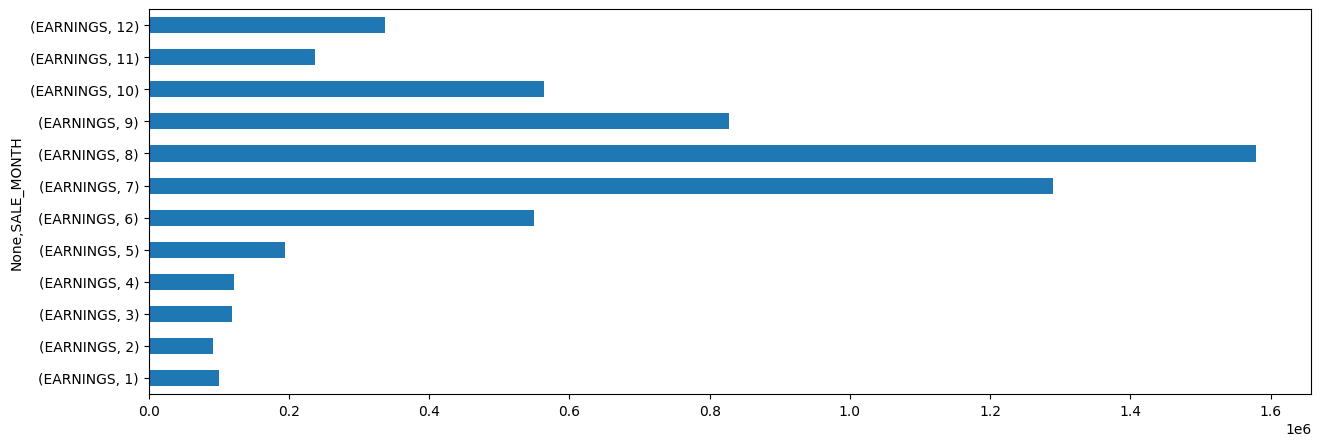

In [24]:
seasonal_df.groupby(['SALE_MONTH']).agg({'EARNINGS':'sum'}).unstack(1).plot.barh(figsize=(15,5))

<h1>Products Popularity</h1>
<h4>Display the quantity of products between seasons </h4>


<Axes: ylabel='ITEM_CATEGORY'>

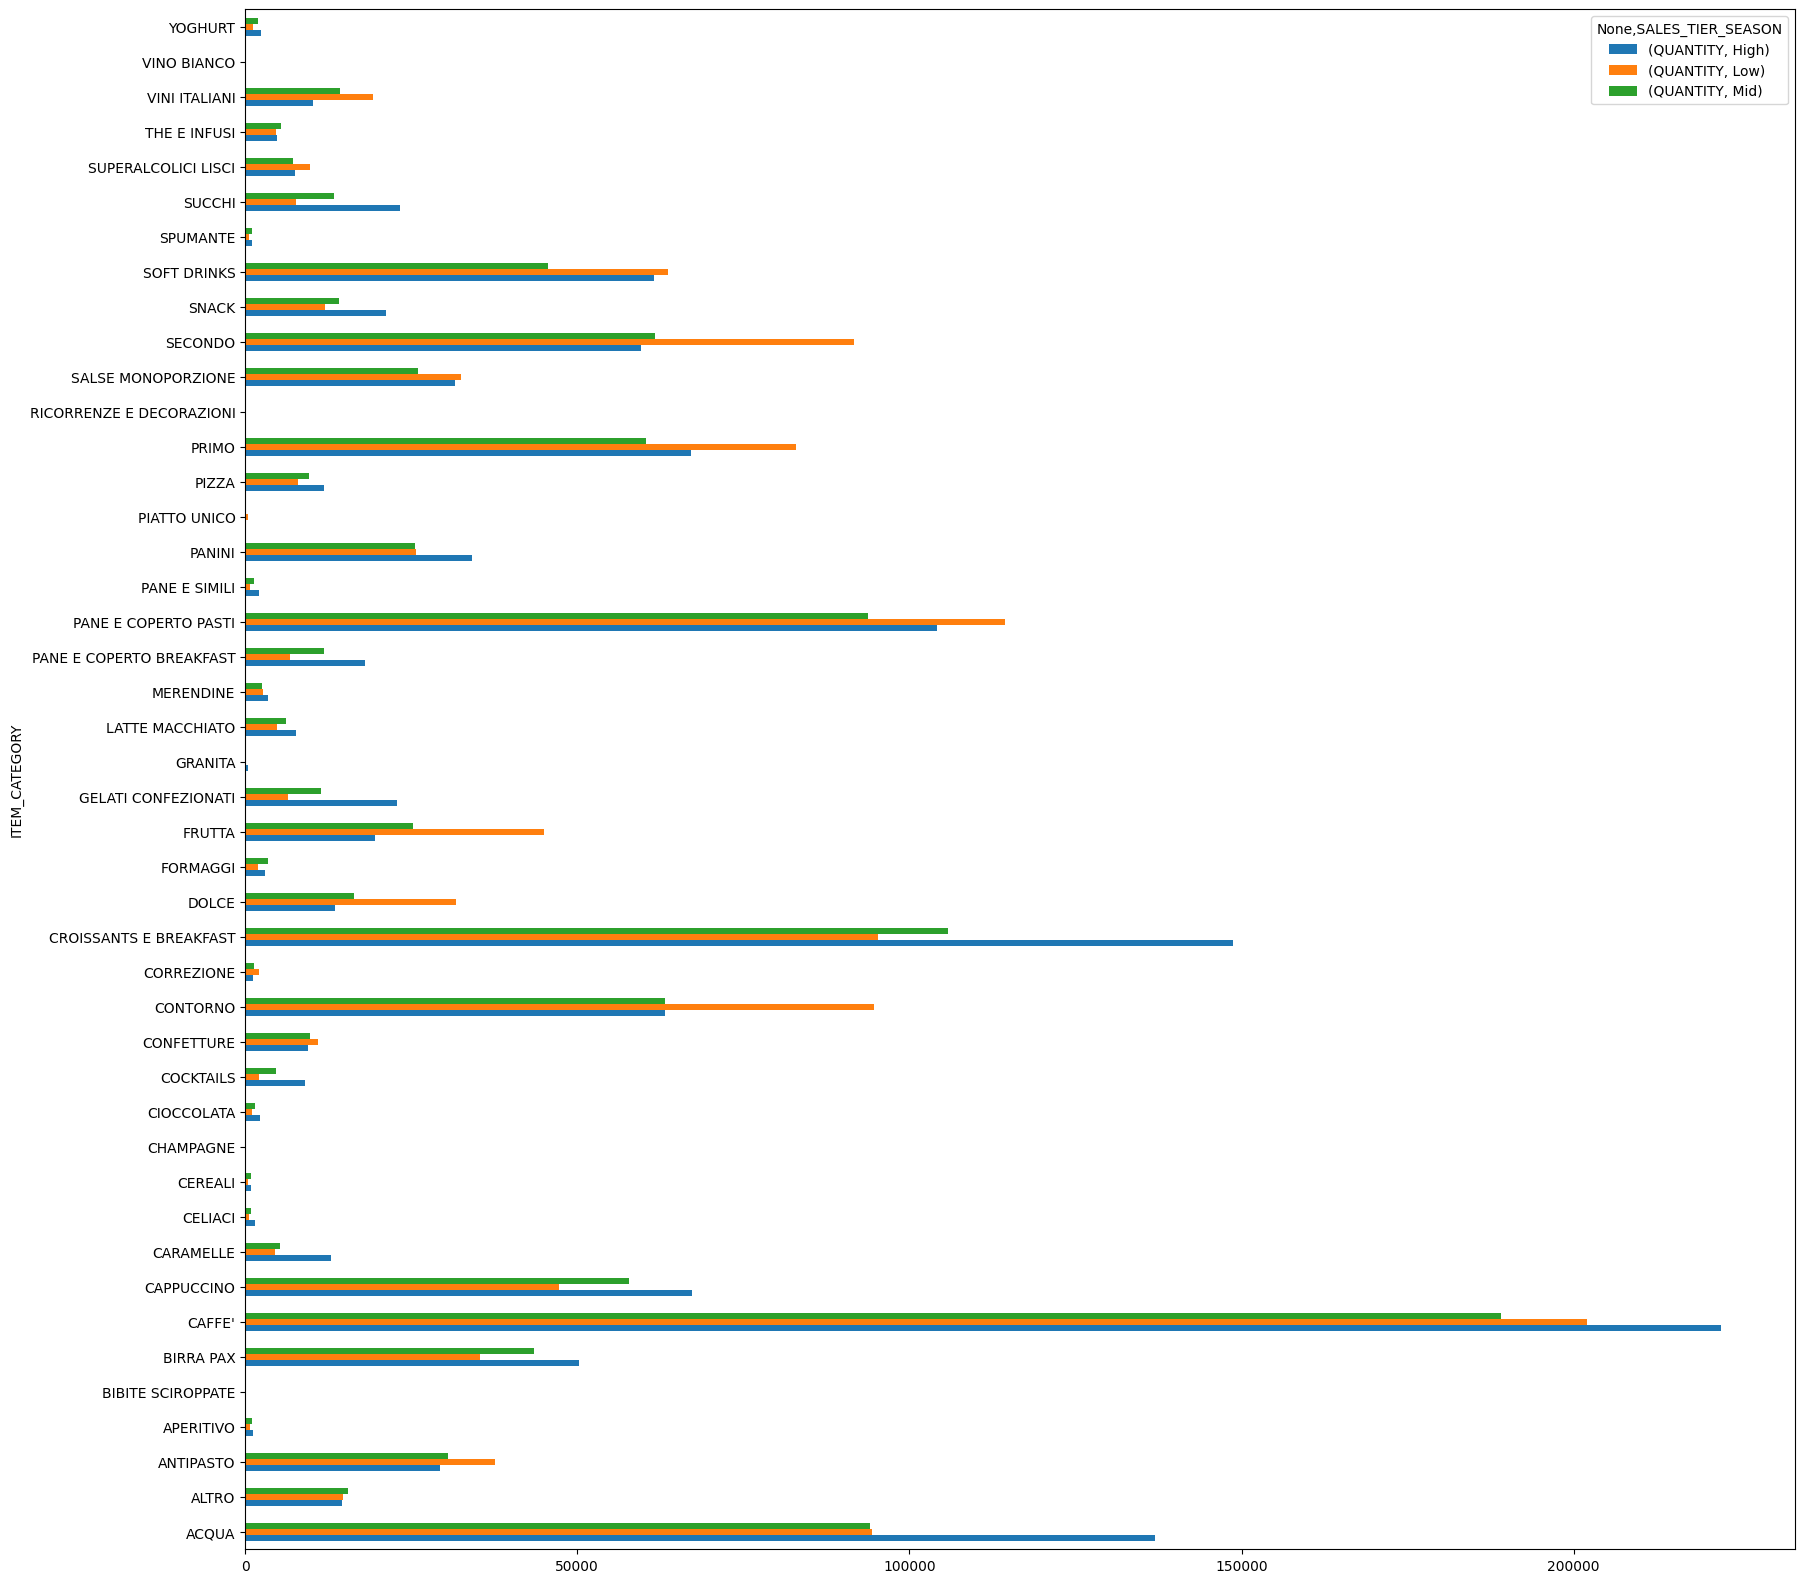

In [25]:
seasonal_df.groupby(['ITEM_CATEGORY','SALES_TIER_SEASON']).agg({'QUANTITY':'sum'}).unstack(1).plot.barh(figsize=(20,20))

<h4>Display the quantity of products weekend and not weekend </h4>

<Axes: ylabel='ITEM_CATEGORY'>

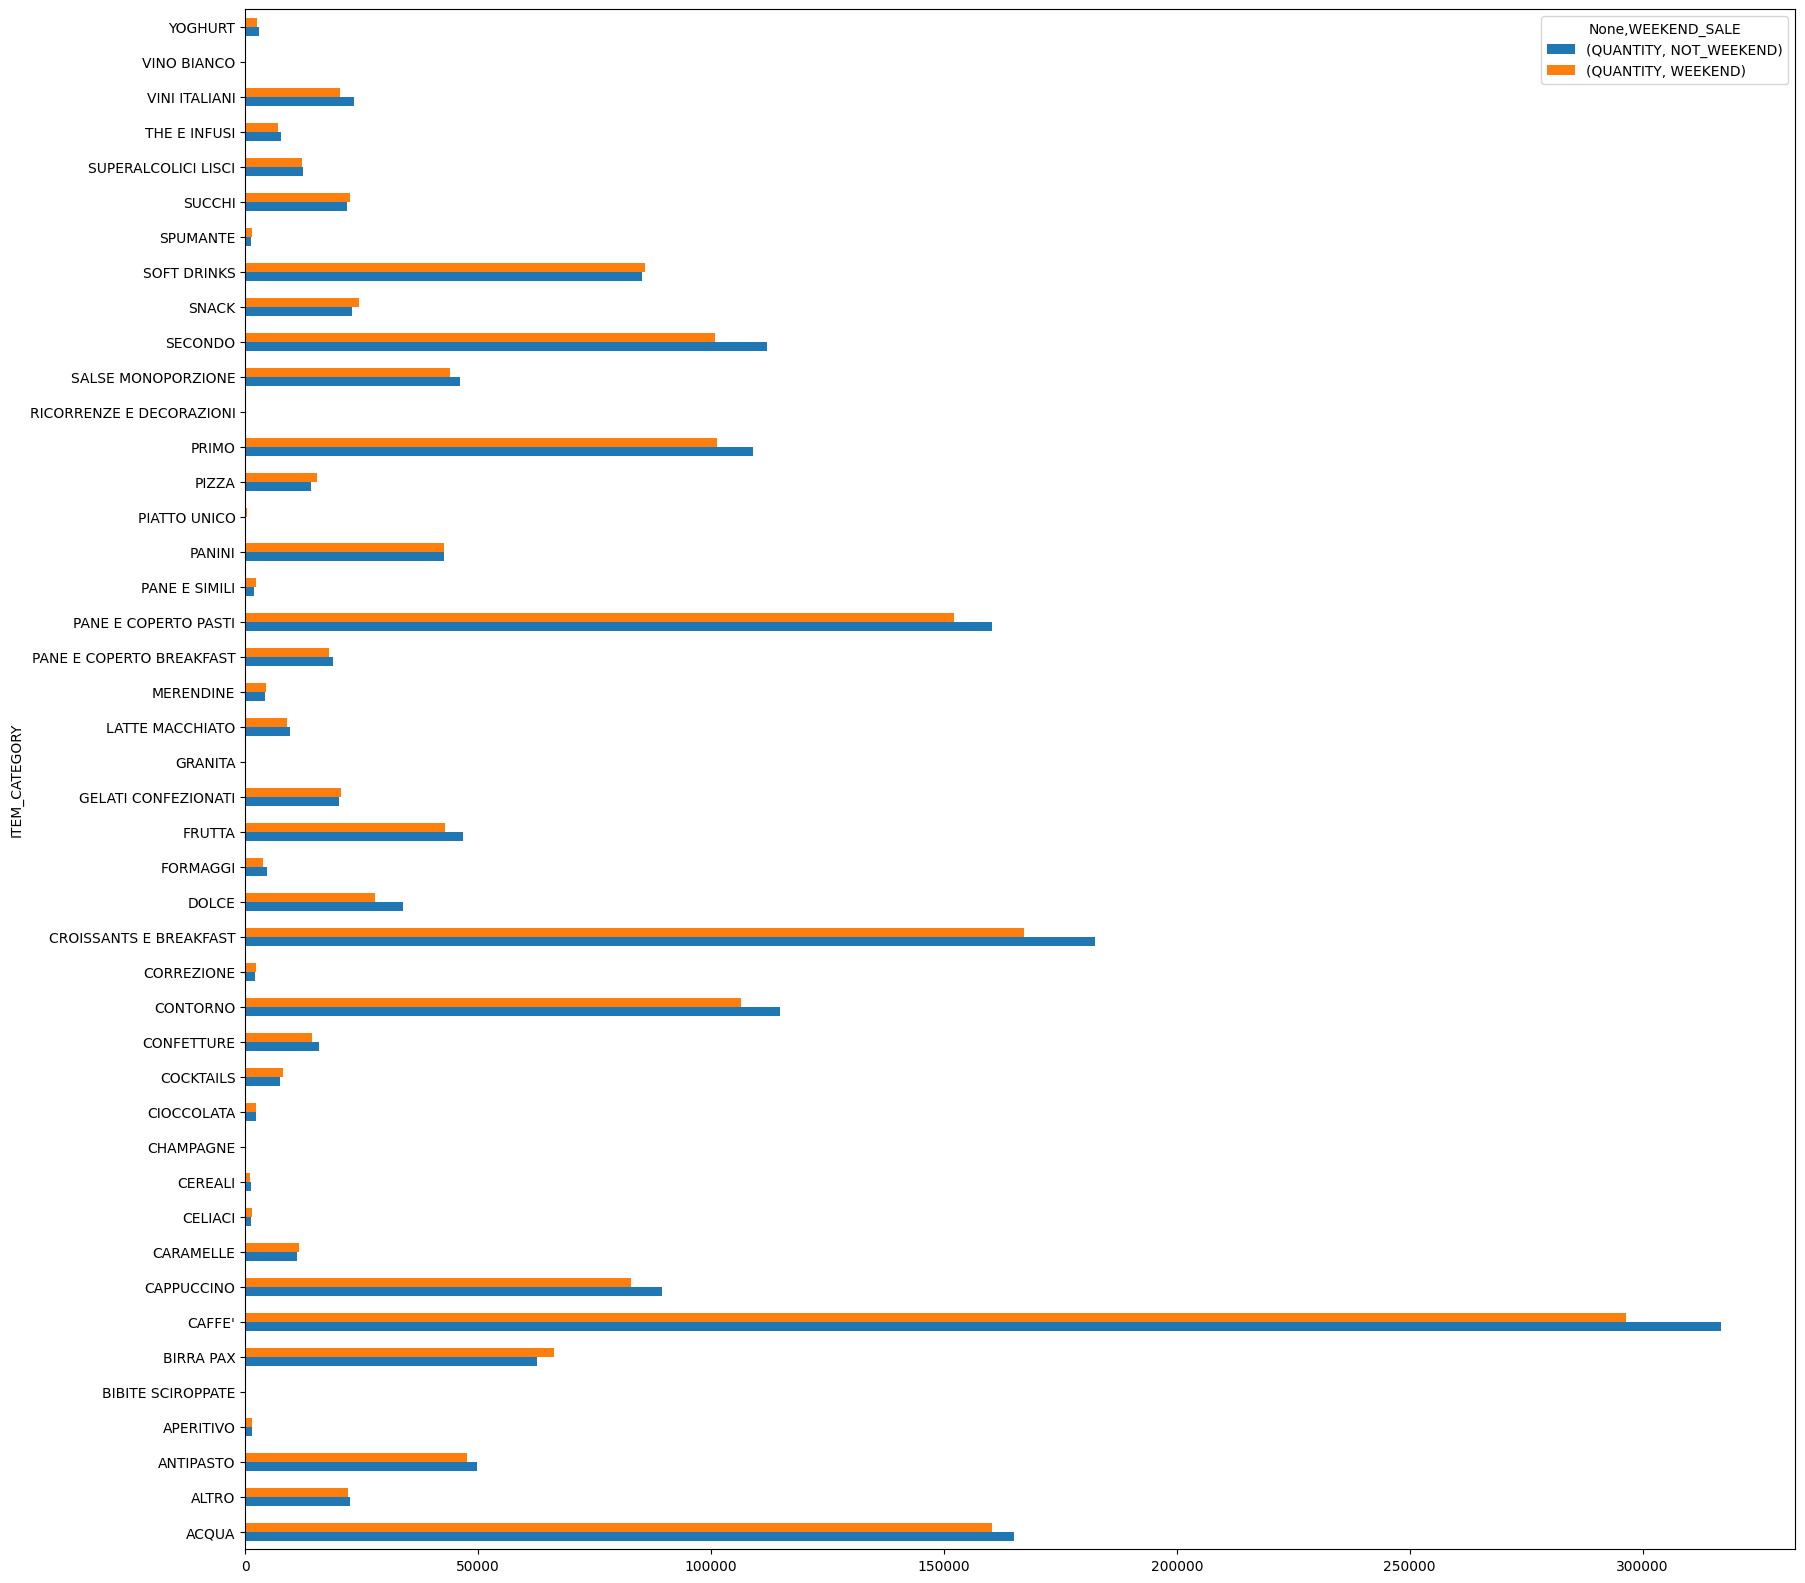

In [26]:
seasonal_df.groupby(['ITEM_CATEGORY','WEEKEND_SALE']).agg({'QUANTITY':'sum'}).unstack(1).plot.barh(figsize=(20,20))

<h1>Separate the data to six groups according to seasons and weekends</h1>
<h4>Display the quantity </h4>

<Axes: ylabel='SALES_TIER_SEASON'>

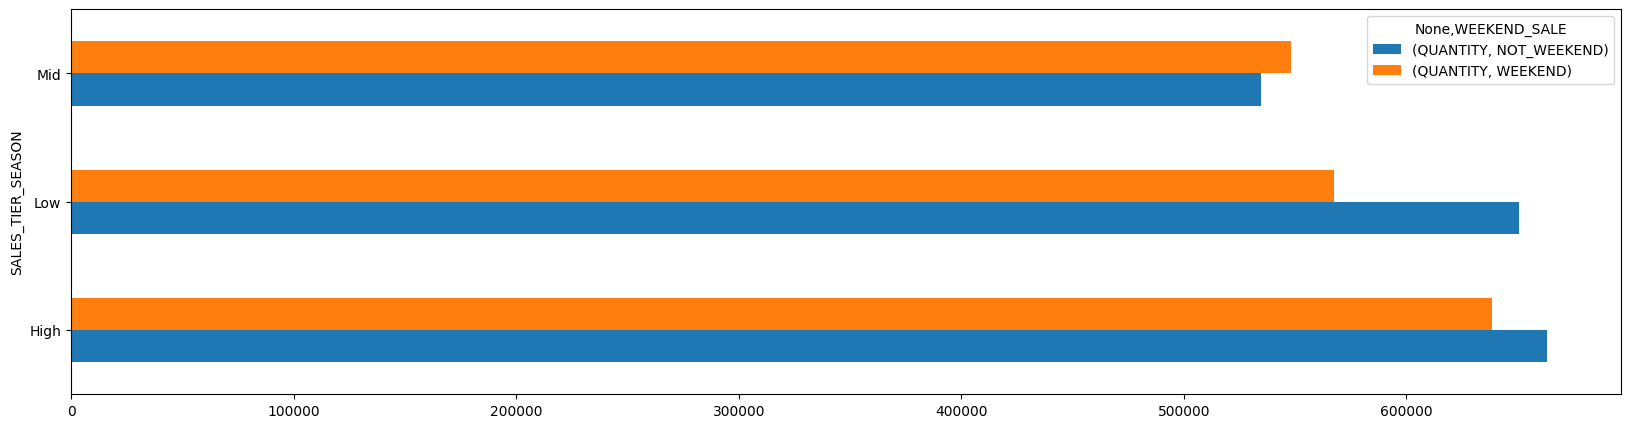

In [27]:
seasonal_df.groupby(['SALES_TIER_SEASON','WEEKEND_SALE']).agg({'QUANTITY':'sum'}).unstack(1).plot.barh(figsize=(20,5))

<h4>Display the earnings </h4>

<Axes: ylabel='SALES_TIER_SEASON'>

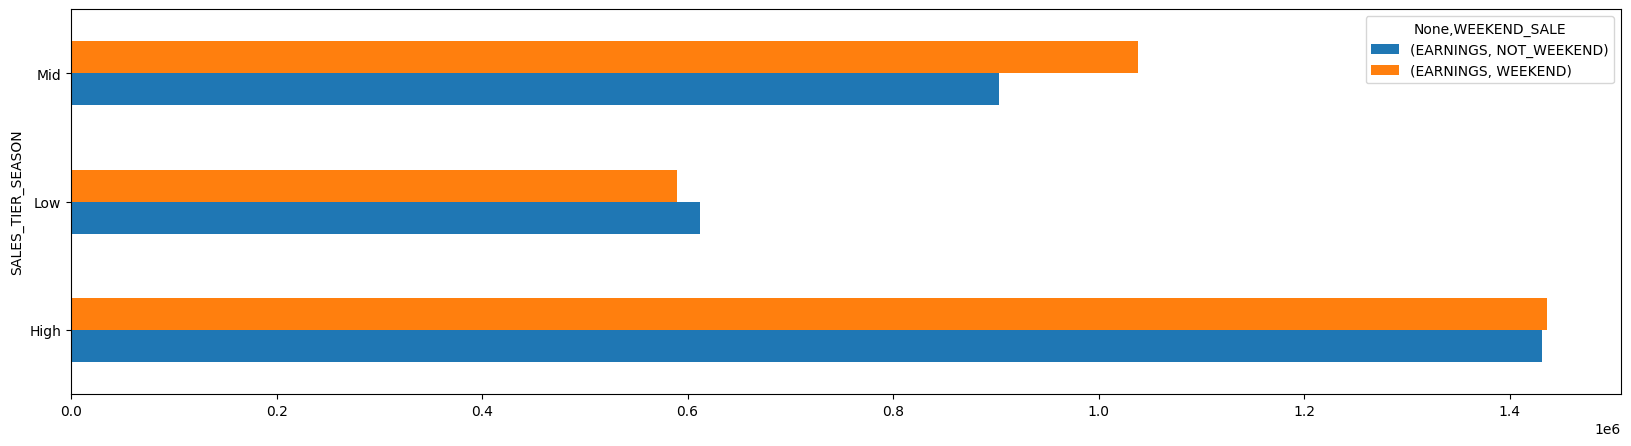

In [28]:
seasonal_df.groupby(['SALES_TIER_SEASON','WEEKEND_SALE']).agg({'EARNINGS':'sum'}).unstack(1).plot.barh(figsize=(20,5))

In [29]:
df_item = pd.read_csv('All items.csv')
item_dict_occasion = df_item[['ITEM','OCCASION']].set_index('ITEM')['OCCASION'].to_dict()
item_dict_dish_kind = df_item[['ITEM','FOOD_CATEGORY']].set_index('ITEM')['FOOD_CATEGORY'].to_dict()
seasonal_df["OCCASION"] = seasonal_df["ITEM"].map(item_dict_occasion)
seasonal_df["DISH_KIND"] = seasonal_df["ITEM"].map(item_dict_dish_kind)

# BCG Categorization 

In [30]:
POINT_OF_SALE = 'RISTORANTE'
OCCASION = 'Lunch/Dinner'
FOOD_CATEGORY = 'Main dish'
addition = "Dessert"
food_df = seasonal_df[(seasonal_df['MENU_CATEGORY'] == 'FOOD') & (seasonal_df['OCCASION'] == OCCASION) & (seasonal_df['DISH_KIND'] == FOOD_CATEGORY)] # & (seasonal_df['DISCOUNT'] == 0) & (seasonal_df['PRICE_PAID'] != 0)]

### General Margin Processing
Saving a state of the processed data while filtered by food category.

In [31]:
food_df.to_csv('processed_data_food_category.csv')

Reloading the data with it's current state.

In [32]:
food_df = pd.read_csv('processed_data_food_category.csv')

#### Getting an average of earnings and quantity for the current food items sold


Therefore we should get the general earnings and quantity sums amoung every season for the average item:


BCG Definition:

<img src="https://integratedinsight.com/wp-content/uploads/2020/06/Menu-Engineering-Matrix-1-1024x767.png"  width="30%" height="30%">

In [33]:
def categorize(row, avg_quantity, avg_earnings):
    if row['QUANTITY'] >= avg_quantity and row['EARNINGS'] >= avg_earnings:
        return 'Star'
    elif row['QUANTITY'] < avg_quantity and row['EARNINGS'] >= avg_earnings:
        return 'Puzzle'
    elif row['QUANTITY'] >= avg_quantity and row['EARNINGS'] < avg_earnings:
        return 'WorkHorse'
    elif row['QUANTITY'] < avg_quantity and row['EARNINGS'] < avg_earnings:
        return 'Dog'

In [34]:
global_avg_earnings_for_sold_item = 0
global_avg_quantity_for_sold_item = 0

def get_bcg_categories_by_season(season: str):
    item_avg_prices = food_df.groupby(['ITEM']).agg({'QUANTITY':'sum', 'EARNINGS':'sum'})
    item_avg_prices_for_season = food_df[food_df['SALES_TIER_SEASON'] == season].groupby(['ITEM']).agg({'QUANTITY':'sum', 'EARNINGS':'mean'})
    item_avg_prices['AVG_EARNINGS_FOR_SINGLE_ITEM'] = item_avg_prices['EARNINGS'] / item_avg_prices['QUANTITY']
    item_avg_prices

    global global_avg_earnings_for_sold_item
    global global_avg_quantity_for_sold_item
    avg_earnings_for_sold_item = item_avg_prices['AVG_EARNINGS_FOR_SINGLE_ITEM'].mean()
    global_avg_earnings_for_sold_item = avg_earnings_for_sold_item
    avg_earnings_for_sold_item

    avg_quantity_for_sold_item = item_avg_prices['QUANTITY'].mean()
    global_avg_quantity_for_sold_item = avg_quantity_for_sold_item
    avg_quantity_for_sold_item

    print(f'Average quantity for an item type sold: {avg_quantity_for_sold_item}')
    print(f'Average earnings for an item sold: {avg_earnings_for_sold_item}')

    item_avg_prices_for_season['BCG_CATEGORY'] = item_avg_prices_for_season.apply(lambda x : categorize(x, avg_quantity_for_sold_item, avg_earnings_for_sold_item), axis=1)
    return item_avg_prices_for_season

### Peak Season

In [35]:
get_bcg_categories_by_season('High')

Average quantity for an item type sold: 909.9087136929461
Average earnings for an item sold: 3.168235208898918


,QUANTITY,EARNINGS,BCG_CATEGORY
ITEM,,,
ABBACCHIO AL FORNO CON PATATE,296,2.745083,Dog
ACCIUGHE PANATE FRITTE,20,-46.920000,Dog
AGNELLO AL FORNO CON PATATE E CARCIOFI,136,1.709048,Dog
ALI DI POLLO SALE E PEPE (C),68,7.535593,Puzzle
ANELLETTI AL FORNO ALLA SICILIANA,10753,7.394632,Star
...,...,...,...
VERDESCA AL ROSMARINO (C),61,7.537568,Puzzle
VERDESCA ALLA MARINARA (C),167,5.486932,Puzzle
VERDESCA PANATA CAPPERI E OLIVE (C),149,6.660328,Puzzle


### Mid Season

In [36]:
get_bcg_categories_by_season('Mid')

Average quantity for an item type sold: 909.9087136929461
Average earnings for an item sold: 3.168235208898918


,QUANTITY,EARNINGS,BCG_CATEGORY
ITEM,,,
ABBACCHIO AL FORNO CON PATATE,360,0.693664,Dog
ACCIUGHE AL VERDE (C),17,-6.392500,Dog
AGNELLO AL FORNO CON PATATE E CARCIOFI,182,-3.206939,Dog
ALI DI POLLO SALE E PEPE (C),553,6.997445,Puzzle
ANELLETTI AL FORNO ALLA SICILIANA,10434,5.222695,Star
...,...,...,...
VERDESCA PANATA CAPPERI E OLIVE (C),479,3.298642,Puzzle
VERDURE GRIGLIATE (RISTO),2,4.040000,Puzzle
VITELLO CON VERDURE (C),254,5.036949,Puzzle


### Low Season

In [37]:
get_bcg_categories_by_season('Low')

Average quantity for an item type sold: 909.9087136929461
Average earnings for an item sold: 3.168235208898918


,QUANTITY,EARNINGS,BCG_CATEGORY
ITEM,,,
ABBACCHIO AL FORNO CON PATATE,471,-0.171875,Dog
ACCIUGHE AL VERDE (C),67,-3.198421,Dog
ACCIUGHE PANATE FRITTE,26,-4.894444,Dog
AGNELLO AL FORNO CON PATATE E CARCIOFI,114,2.344583,Dog
ALI DI POLLO SALE E PEPE (C),392,1.903433,Dog
...,...,...,...
ZUPPA BORSCH,1,4.970000,Puzzle
ZUPPA DI FAGIOLI (C),50,1.684091,Dog
ZUPPA DI LEGUMI (C),25,0.035000,Dog


In [38]:
bcg_df = food_df[['ITEM']].drop_duplicates()
bcg_df['HIGH_SEASON'] = bcg_df['ITEM'].map(get_bcg_categories_by_season('High')['BCG_CATEGORY'])
bcg_df['MID_SEASON'] = bcg_df['ITEM'].map(get_bcg_categories_by_season('Mid')['BCG_CATEGORY'])
bcg_df['LOW_SEASON'] = bcg_df['ITEM'].map(get_bcg_categories_by_season('Low')['BCG_CATEGORY'])

bcg_df.to_csv('Food_BCG.csv')

Average quantity for an item type sold: 909.9087136929461
Average earnings for an item sold: 3.168235208898918
Average quantity for an item type sold: 909.9087136929461
Average earnings for an item sold: 3.168235208898918
Average quantity for an item type sold: 909.9087136929461
Average earnings for an item sold: 3.168235208898918


In [39]:
high_mid_diff = bcg_df[bcg_df['HIGH_SEASON'] !=  bcg_df['MID_SEASON']]
low_mid_diff = high_mid_diff[high_mid_diff['MID_SEASON'] != high_mid_diff['LOW_SEASON']]
low_high_diff = low_mid_diff[low_mid_diff['HIGH_SEASON'] != low_mid_diff['LOW_SEASON']]

low_high_diff

,ITEM,HIGH_SEASON,MID_SEASON,LOW_SEASON
0,PIZZA MARGHERITA (C),NaN,NaN,Puzzle
27,RISO AROMATIZZATO ALLE SPEZIE,NaN,NaN,Puzzle
28,INSALATA POLPO PEPERONI E OLIVE VERDI,Puzzle,Dog,WorkHorse
32,BOLLITO MISTO CON SALSA VERDE (C),NaN,Puzzle,Dog
76,MERLUZZO PANATO FRITTO,NaN,Dog,Puzzle
...,...,...,...,...
375126,ZUPPA BORSCH,NaN,NaN,Puzzle
375704,LINGUINE ALLE VONGOLE,NaN,NaN,Puzzle
375764,ARROSTO DI TACCHINO AL BRANDY,NaN,NaN,Dog
377109,PASSATO DI PISELLI (C),NaN,NaN,Puzzle


### Optimization Algorithm

TODO: 

Create an algorithm which takes number of constraints and generates the best output available. \
Each constraint may vary as the number of items available from each BCG category. \
Should aggregate the drinks as well.

The BCG category shuold be picked by a ranking metric which varies between seasons (inside every BCG category).

Function template: `optimize(stars: int, work_horses: int, puzzles: int, dogs: int) : DataFrame`

In [40]:
#By total earnings
bcg_high_season_df = get_bcg_categories_by_season('High')
bcg_high_season_df.reset_index(inplace=True)

# set a new column total earnings
bcg_high_season_df['TOTAL_EARNINGS'] = bcg_high_season_df['QUANTITY'] * bcg_high_season_df['EARNINGS']

def optimize(stars: int, work_horses: int, puzzles: int, dogs: int):
    stars_df_bcg =  bcg_high_season_df[bcg_high_season_df['BCG_CATEGORY'] =='Star'].sort_values('TOTAL_EARNINGS', ascending = False).head(stars)
    dog_df_bcg =  bcg_high_season_df[bcg_high_season_df['BCG_CATEGORY'] =='Dog'].sort_values('TOTAL_EARNINGS', ascending = False).head(dogs)
    puzzle_df_bcg =  bcg_high_season_df[bcg_high_season_df['BCG_CATEGORY'] =='Puzzle'].sort_values('TOTAL_EARNINGS', ascending = False).head(puzzles)
    hourse_df_bcg =  bcg_high_season_df[bcg_high_season_df['BCG_CATEGORY'] =='WorkHorse'].sort_values('TOTAL_EARNINGS', ascending = False).head(work_horses)
    optimized_df = pd.concat([stars_df_bcg,puzzle_df_bcg,dog_df_bcg,hourse_df_bcg],ignore_index=True)
    return optimized_df

generated_df = optimize(2,5,2,0)
print("Top earnings Method")
generated_df.to_csv("GeneratedMenuByTopEarnings.csv")


Average quantity for an item type sold: 909.9087136929461
Average earnings for an item sold: 3.168235208898918
Top earnings Method


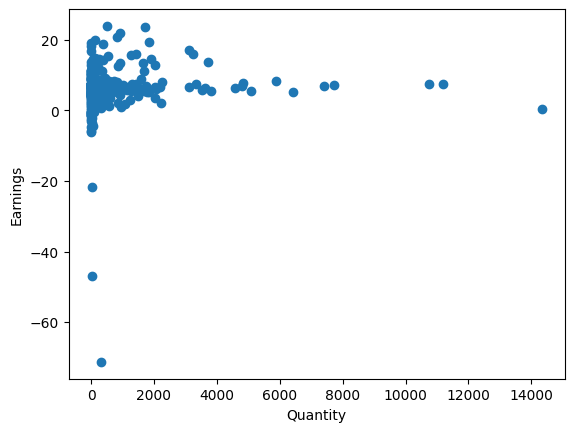

Second Method Linear
909.9087136929461
3.168235208898918
['PENNETTE AL POMODORO' 11193 7.591654797358539 'Star']
['ANELLETTI AL FORNO ALLA SICILIANA' 10753 7.394632450820884 'Star']
['PANINO' 14337 0.49498183799491463 'WorkHorse']
['SFOGLIATA RICCIA FRZ 130g' 2229 2.0888096607245545 'WorkHorse']
['SALUMI E FORMAGGI ASSORTITI' 1241 2.9722672508214676 'WorkHorse']
['SALUMI ASSORTITI' 1073 1.7523156532988358 'WorkHorse']
['FOCACCIA STRISCIA' 953 1.06047976011994 'WorkHorse']
['PENNE ALLA GENOVESE' 907 6.916238532110092 'Puzzle']
['INSALATA DI SEPPIE CON PATATE E PISELLI' 905 4.253149606299212 'Puzzle']
<class 'numpy.ndarray'>


In [41]:

data = bcg_high_season_df
name = data.iloc[:, 0]
quantity = data.iloc[:, 1]
earnings = data.iloc[:, 2]
category = data.iloc[:, 3]
all_data = np.array((name, quantity, earnings, category)).T



# ratio is the importance of popularity compared to profitability.
# For example if ratio=0 find_best_points will return only based on profitability
# if ratio=1 popularity and profitability are equally important.
def find_best_points(X: np.ndarray, quantityMean: float, earningsMean: float, n: int, category=None,
                     ratio: int = 1) -> np.ndarray:
    m = -1 * ratio
    if category == 'Puzzle':
        b = np.max(X[:, 1]) + ratio * quantityMean
    elif category == 'Dog':
        b = earningsMean + ratio * quantityMean
    elif category == 'WorkHorse':
        b = earningsMean + ratio * np.max(X[:, 2])
    else:
        b = np.max(X[:, 1]) + ratio * np.max(X[:, 2])

    # Calculate the distance from each point to the line
    distances = np.abs(X[:, 1] - m * X[:, 2] - b) / np.sqrt(m ** 2 + 1)
    indices = distances.argsort()[:n]

    return X[indices]


def optimize_decenet(stars: int, work_horses: int, puzzles: int, dogs: int) -> np.ndarray:
    quantityMean = global_avg_quantity_for_sold_item
    earningsMean = global_avg_earnings_for_sold_item
    print(global_avg_quantity_for_sold_item)
    print(earningsMean)
    puzzle_data = all_data[all_data[:, 3] == 'Puzzle']
    dog_data = all_data[all_data[:, 3] == 'Dog']
    horse_data = all_data[all_data[:, 3] == 'WorkHorse']
    stars_data = all_data[all_data[:, 3] == 'Star']
    best_puzzle = find_best_points(puzzle_data, quantityMean, earningsMean,puzzles)
    best_dog = find_best_points(dog_data, quantityMean, earningsMean,dogs)
    best_horse = find_best_points(horse_data, quantityMean, earningsMean, work_horses)
    best_stars = find_best_points(stars_data, quantityMean, earningsMean, stars)

    return np.vstack((best_stars, best_horse, best_puzzle, best_dog))


plt.scatter(quantity, earnings)
plt.xlabel('Quantity')
plt.ylabel('Earnings')
plt.show()

print("Second Method Linear")
op_data = optimize_decenet(2, 5, 2, 0)
for row in op_data:
    print(row)
print(type(op_data))


df_generated_menu_linear = pd.DataFrame(op_data, columns=['ITEM', 'QUANTITY', 'AVG_EARNING', 'BCG_CATEGORY'])

# convert the data types of QUANTITY and AVG_EARNING columns to int and float respectively
df_generated_menu_linear[['QUANTITY', 'AVG_EARNING']] = df_generated_menu_linear[['QUANTITY', 'AVG_EARNING']].astype({'QUANTITY': int, 'AVG_EARNING': float})

# display the resulting dataframe
df_generated_menu_linear.to_csv("GeneratedMenuByLinear.csv")


### Match drinks to generated menu

TODO: 
Generated menu aggregate the drinks as well.

step 1:groupby order (each row will recpit)
step 2: keep all orders with (food and drink)
step 3: include only the oders with the generated menu (at least one item in the order from the generated menu)
step 4: create a column with the generated items (can have duplicates) and on the order order which contains the item
step 5: group by all orders by item
step 6: bring back the most worst of every item in the order columns.


### Creating a list for each food category,
### in "list_of_all_items_not_in_menu" we create a list without optimezed menu items



In [42]:
list_of_optimezed_menu = generated_df['ITEM'].to_list()

def join_strings(series):
    return ','.join(series)

# function that return the generated df.
def find_row_with_items(row):
    pattern = '|'.join(list_of_optimezed_menu)
    matches = re.findall(pattern, row)
    if matches:
        return row
    else:
        return None
    

def match_items(df, list_of_items):
    # Split the order strings into lists of items
    order_lists = df['ORDER'].str.split(',')
    
    # Create a list of lists, where each sublist contains the matching items for each order
    item_lists = []
    for order_list in order_lists:
        item_list = []
        for item in list_of_items:
            if item in order_list:
                item_list.append(item)
        item_lists.append(item_list)
    
    # Flatten the list of lists into a single list of items
    items = [item for sublist in item_lists for item in sublist]
    
    # Repeat each order in the DataFrame for each item in the matching list
    orders = []
    for i, order_list in enumerate(order_lists):
        for item in item_lists[i]:
            orders.append(','.join(order_list))
    
    # Create the new DataFrame with the 'ITEM' column
    new_df = pd.DataFrame({'ORDER': orders, 'ITEM': items})
    
    return new_df

# Define a function to extract the top n words from a string
def top_n_words(string, n):
    # Split the string into words
    words = string.split(',')
    # Count the frequency of each word
    word_counts = Counter(words)
    # Return the top n most common words
    return [word for word, count in word_counts.most_common(n)]



### Finding the best proudect with main dish.the idea send the kind of proudect that wanted from catagorys Drink,Side dish,Snack 
### remove all other proudects that are not that kind 
### find the best items based on the grouped by bill to have one bill to count the highest appernce of the (kind,main dish)
### the function works on counting how many other people orderd that kind of dish with main dish and return the highest dish

In [47]:
def remove_items_that_not_needed(kind:str) -> list:
    switch = {
        'Drink': df_item[df_item['FOOD_CATEGORY'] == 'Side dish']['ITEM'].tolist() +
                 df_item[df_item['FOOD_CATEGORY'] == 'Dessert']['ITEM'].tolist() +
                 df_item[df_item['FOOD_CATEGORY'] == 'Snack']['ITEM'].tolist(),
        'Side dish': df_item[df_item['FOOD_CATEGORY'] == 'Dessert']['ITEM'].tolist() +
                     df_item[df_item['FOOD_CATEGORY'] == 'Snack']['ITEM'].tolist() +
                     df_item[df_item['FOOD_CATEGORY'] == 'Drink']['ITEM'].tolist(),
        'Snack': df_item[df_item['FOOD_CATEGORY'] == 'Side dish']['ITEM'].tolist() +
                 df_item[df_item['FOOD_CATEGORY'] == 'Dessert']['ITEM'].tolist() +
                 df_item[df_item['FOOD_CATEGORY'] == 'Drink']['ITEM'].tolist(),
        'Dessert': df_item[df_item['FOOD_CATEGORY'] == 'Side dish']['ITEM'].tolist() +
            df_item[df_item['FOOD_CATEGORY'] == 'Dessert']['ITEM'].tolist() +
            df_item[df_item['FOOD_CATEGORY'] == 'Drink']['ITEM'].tolist()         
    }
    return switch.get(kind)

def remove_item_from_top_words(df):
    for i in range(len(df)):
        item = df.loc[i, "ITEM"]
        top_words = df.loc[i, "TOP_WORDS"]
        top_words = [word for word in top_words if word != item]
        top_words = [word for word in top_words if word != "ITEM"]
        df.at[i, "TOP_WORDS"] = top_words
    return df



def suggets_proudect_by_food_category(kind:str)-> pd.DataFrame:
    list_of_all_main_dish = df_item[df_item['FOOD_CATEGORY'] == 'Main dish']['ITEM'].tolist()
    list_of_all_main_dish_items_not_in_menu = [ x for x in list_of_all_main_dish if x not in  list_of_optimezed_menu ] # All main dish without generated df.
    all_data_df_without_destroy = seasonal_df.dropna(subset=['DISH_KIND','OCCASION']) # drop nan (Items marked as destroy)
    # switch case needed (drop the items that not in the catagory )
    list_of_all_main_dish_items_not_in_menu += remove_items_that_not_needed(kind)
    all_data_df_without_destroy = all_data_df_without_destroy[~all_data_df_without_destroy['ITEM'].isin(list_of_all_main_dish_items_not_in_menu)] # remove all main dish not in generated df
    grouped_df = all_data_df_without_destroy.groupby(['VOYAGE_ID_VOYAGE_DATE', 'VOYAGE_DATE', 'SALE_DATE', 'BILL_NUMBER', 'BILL_TIME','BILL_HOUR']).agg({'ITEM':join_strings,'DISH_KIND':join_strings})
    # filltering rows thats has the menu items (main dish), rename after to order (cause of the groupby).
    filtered_rows = grouped_df['ITEM'].apply(find_row_with_items)
    filtered_rows = filtered_rows.dropna()
    all_orders_include_genreted_df = grouped_df.loc[filtered_rows.index]
    all_orders_include_genreted_df.reset_index(inplace=True)
    ordered_df = all_orders_include_genreted_df[['ITEM']].copy()
    ordered_df = ordered_df.rename(columns={'ITEM': 'ORDER'})
    ordered_df = match_items(ordered_df,list_of_optimezed_menu)
    # remove the generated menu from orders and than groupby
    suggest_df = ordered_df.groupby(['ITEM']).agg({'ORDER': join_strings})
    suggest_df.reset_index(inplace=True)
    # Apply the function to each row of the dataframe
    suggest_df['TOP_WORDS'] = suggest_df['ORDER'].apply(lambda x: top_n_words(x, 4))
    suggest_df.drop(columns=['ORDER'],inplace=True)
    suggest_df = remove_item_from_top_words(suggest_df)

    # Print the resulting dataframe
    return suggest_df

suggets_proudect_by_food_category(addition).to_csv("test12345.csv")

###